# Sounding LCL Analysis

For funzies I wanted to see how long it would take for a job like this to run and see what the best way to deal with the results is. Also maybe find some fun results when looking at several year's worth of data at a given site.

In [1]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.io import get_upper_air_data
from metpy.plots import SkewT
from metpy.units import units
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
def get_sounding_parameters(ds):
    date = ds.name.to_pydatetime()
    station = 'OUN'
    try:
        dataset = get_upper_air_data(date, station)
    except:
        return (np.nan, np.nan, np.nan, np.nan, np.nan, np.nan)
    
    p = dataset.variables['pressure'][:]
    T = dataset.variables['temperature'][:]
    Td = dataset.variables['dewpoint'][:]
    u = dataset.variables['u_wind'][:]
    v = dataset.variables['v_wind'][:]
    
    try:
        lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
    except:
        lcl_pressure, lcl_temperature = np.nan * p.units, np.nan * T.units
   
    try:
        lfc_pressure, lfc_temperature = mpcalc.lfc(p, T, Td)
    except:
        lfc_pressure, lfc_temperature = np.nan * p.units, np.nan * T.units

        
    return (lcl_pressure.m, lcl_temperature.m, lfc_pressure.m, lfc_temperature.m, T[0].m, Td[0].m)

In [3]:
start_date = datetime(2015, 1, 1, 0)
end_date = datetime(2017, 1, 1, 0)
index = pd.date_range(start_date, end_date, freq='D')
columns = ['LCL Pressure', 'LCL Temperature', 'LFC Pressure', 'LFC Temperature', 'sfc Temperature', 'sfc Dewpoint']

In [4]:
df = pd.DataFrame(index=index, columns=columns)

In [5]:
df = df.apply(get_sounding_parameters, axis=1)

/Users/johnleeman/gitrepos/MetPy/metpy/calc/thermo.py:190: RuntimeWarning: invalid value encountered in absolute
  if np.abs(new_p - p).max() < eps:
/Users/johnleeman/anaconda/envs/metpydev/lib/python3.6/site-packages/pint/quantity.py:1236: RuntimeWarning: invalid value encountered in absolute
  out = uf(*mobjs)


In [6]:
df

,LCL Pressure,LCL Temperature,LFC Pressure,LFC Temperature,sfc Temperature,sfc Dewpoint
2015-01-01,901.034822,-12.288410,NaN,NaN,-5.1,-11.1
2015-01-02,968.853713,-0.970307,NaN,NaN,0.0,-0.8
2015-01-03,978.000000,2.400000,NaN,NaN,2.4,2.4
2015-01-04,955.195090,3.581610,NaN,NaN,4.8,3.8
2015-01-05,835.620477,-14.828926,NaN,NaN,-1.7,-12.7
2015-01-06,816.136082,-9.393748,NaN,NaN,5.0,-7.0
2015-01-07,807.685878,-8.403980,NaN,NaN,7.2,-5.8
2015-01-08,843.111902,-18.976874,NaN,NaN,-5.9,-16.9
2015-01-09,788.614942,-14.895150,NaN,NaN,1.8,-12.2
2015-01-10,772.035172,-19.486589,NaN,NaN,-0.5,-16.5


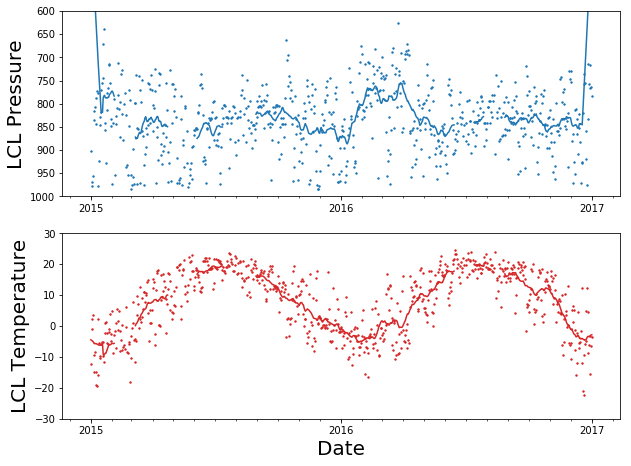

In [7]:
N = 30
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
# Setup figure and axes
# Generally plots is ~1.33x width to height (10,7.5 or 12,9)
fig = plt.figure(figsize=(10,7.5))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# Set labels and tick sizes
ax2.set_xlabel(r'Date', fontsize=20)
ax1.set_ylabel(r'LCL Pressure', fontsize=20)
ax2.set_ylabel(r'LCL Temperature', fontsize=20)
# Turns off chart clutter

# Turn off top and right tick marks 
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  

ax2.get_xaxis().tick_bottom()  
ax2.get_yaxis().tick_left()      

# Plotting
ax1.scatter(df.index, df['LCL Pressure'], s =2)
ax2.scatter(df.index, df['LCL Temperature'], s =2, color='tab:red')
ax1.plot(df.index, np.convolve(df['LCL Pressure'], np.ones((N,))/N, mode='same'))
ax2.plot(df.index, np.convolve(df['LCL Temperature'], np.ones((N,))/N, mode='same'), color='tab:red')

ax1.set_ylim(1000, 600)
ax2.set_ylim(-30, 30)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_minor_locator(months)
ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(yearsFmt)
ax2.xaxis.set_minor_locator(months)

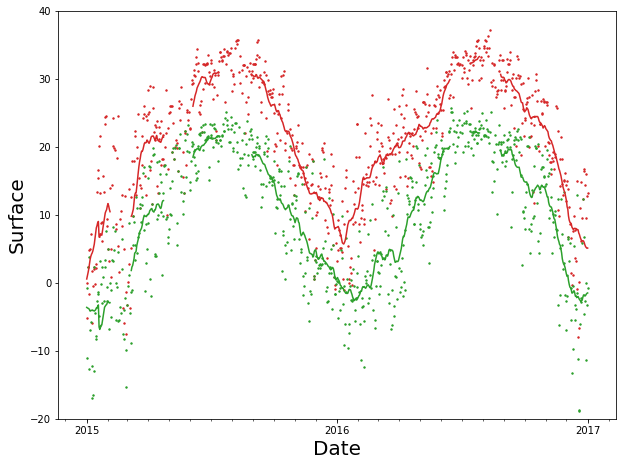

In [8]:
N = 30
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
# Setup figure and axes
# Generally plots is ~1.33x width to height (10,7.5 or 12,9)
fig = plt.figure(figsize=(10,7.5))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel(r'Date', fontsize=20)
ax1.set_ylabel(r'Surface', fontsize=20)

# Turns off chart clutter

# Turn off top and right tick marks 
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()    

# Plotting
ax1.scatter(df.index, df['sfc Temperature'], s =2, color='tab:red')
ax1.scatter(df.index, df['sfc Dewpoint'], s =2, color='tab:green')
ax1.plot(df.index, np.convolve(df['sfc Temperature'], np.ones((N,))/N, mode='same'), color='tab:red')
ax1.plot(df.index, np.convolve(df['sfc Dewpoint'], np.ones((N,))/N, mode='same'), color='tab:green')

ax1.set_ylim(-20,40)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_minor_locator(months)
ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(yearsFmt)
ax2.xaxis.set_minor_locator(months)